In [1]:
import pandas as pd

---

## Loading data

In [2]:
problematics_regarding_time = pd.read_csv(
    "../../datasets/actives_and_problematics_regarding_time_last_30_days_from-27-07-2022.csv")

In [3]:
problematics_regarding_time.drop("ReportId", axis=1, inplace=True)
problematics_regarding_time.rename(columns={"RecordId": "ReportId"}, inplace=True) # record id = report id derived

In [4]:
interest_cols = {
    'Name': "first",
    "ReportId": "first",
    "Description": "first",
    "DurationInMinutes": ["min", "max", "median", "mean", "std", "count"],
    'RowsProcessed': ["sum", "min", "max", "median", "mean", "std"],
    "RowsReturned": ["first", "unique", "count"],
    'ConnectionType': ["first", "unique", "count"],
    'ColumnHeaders': ["first", "unique", "count"], 
    'DashboardId': "first",
    'DashboardName': "first",
    'Format': "first", 
    'GroupedColumnHeaders': ["first", "unique"],
    "OperationType": ["first", "unique", "count"],
    'OsName': ["first", "unique", "count"], 
    'OsVersion': ["first", "unique", "count"],
    'PageStartTime': ["first", "unique"],
    'PageUrl': ["first", "unique", "count"],
    'PreviousPageAppName': ["first", "unique", "count"],
    'PreviousPageEntityType': ["first", "unique", "count"], 
    'PreviousPageUrl': ["first", "unique", "count"],
    'DisplayedFieldEntities': ["first", "unique", "count"],
    'EvaluationTime': ["first", "unique", "count"],
    'DeviceModel': ["first", "unique", "count"], 
    'DevicePlatform': ["first", "unique", "count"]
}

In [5]:
summary = problematics_regarding_time[list(interest_cols.keys())]\
    .groupby("Name")\
    .agg({k: v for k, v in interest_cols.items() if k!="Name"})\
    .reset_index()

In [6]:
new_column_names = []
for k, v in zip(summary.columns.get_level_values(0), summary.columns.get_level_values(1)):
    columnName = k + ("" if v=="first" else v.capitalize())
    new_column_names.append(columnName)

In [7]:
summary.columns = new_column_names

In [8]:
summary

,Name,ReportId,Description,DurationInMinutesMin,DurationInMinutesMax,DurationInMinutesMedian,DurationInMinutesMean,DurationInMinutesStd,DurationInMinutesCount,RowsProcessedSum,...,DisplayedFieldEntitiesCount,EvaluationTime,EvaluationTimeUnique,EvaluationTimeCount,DeviceModel,DeviceModelUnique,DeviceModelCount,DevicePlatform,DevicePlatformUnique,DevicePlatformCount
0,AST Account Hierarchy Report,00O6P000000yX5NUAU,This report is used by the AST to troubleshoot...,1.385883,1.385883,1.385883,1.385883,NaN,1,4,...,1,0,[0],1,NaN,[nan],0,SFX:BROWSER:DESKTOP,[SFX:BROWSER:DESKTOP],1
1,Chat SLA - Wait Time,00O0b000004AoOOEA0,None,7.060517,7.060517,7.060517,7.060517,NaN,1,0,...,1,0,[0],1,NaN,[nan],0,SFX:BROWSER:DESKTOP,[SFX:BROWSER:DESKTOP],1
2,Copy of Copy of BD Status Report,00O2R000003JQyNUAW,None,1.594933,1.594933,1.594933,1.594933,NaN,1,5407,...,1,0,[0],1,NaN,[nan],0,SFX:BROWSER:DESKTOP,[SFX:BROWSER:DESKTOP],1
3,EWS MICC & WO TL Nadiri,00O6P000000VF5IUAW,"Cases on InProgress, where WorkOrders are alre...",2.233383,3.337883,2.785633,2.785633,0.780999,2,102,...,2,0,[0],2,NaN,[nan],0,SFX:BROWSER:DESKTOP,[SFX:BROWSER:DESKTOP],2
4,Lightning DSP Dispatches,00O6P000001B8LVUA0,None,3.174300,3.174300,3.174300,3.174300,NaN,1,31310,...,1,0,[0],1,NaN,[nan],0,SFX:BROWSER:DESKTOP,[SFX:BROWSER:DESKTOP],1
5,My Cases and Tasks,00O0b000004kTazEAE,None,10.712000,10.712000,10.712000,10.712000,NaN,1,31,...,1,0,[0],1,NaN,[nan],0,SFX:BROWSER:DESKTOP,[SFX:BROWSER:DESKTOP],1
6,Parent Project Order Details,00O2R000004Am1WUAS,None,2.716267,2.716267,2.716267,2.716267,NaN,1,154,...,1,0,[0],1,NaN,[nan],0,SFX:BROWSER:DESKTOP,[SFX:BROWSER:DESKTOP],1
7,Weller Manual Time Tracking (HES),00O2R000004IlyzUAC,None,2.584200,2.584200,2.584200,2.584200,NaN,1,787,...,1,0,[0],1,NaN,[nan],0,SFX:BROWSER:DESKTOP,[SFX:BROWSER:DESKTOP],1


In [9]:
summary.to_csv("actives_and_problematics_summary.csv")

In [10]:
problematic_reports = list(summary.ReportId.unique())

In [11]:
problematic_reports

['00O6P000000yX5NUAU',
 '00O0b000004AoOOEA0',
 '00O2R000003JQyNUAW',
 '00O6P000000VF5IUAW',
 '00O6P000001B8LVUA0',
 '00O0b000004kTazEAE',
 '00O2R000004Am1WUAS',
 '00O2R000004IlyzUAC']

In [12]:
import re

pattern = re.compile(r'\/lightning\/r\/(?P<report_type>[a-zA-Z]{4,})\/(?P<report_id>[0-9a-zA-Z]{18})')

def filter_run_report_endpoints(pattern, field, url):
    m = re.match(pattern, url)
    if m:
        return m.group(field)

In [13]:
import os
from collections import defaultdict

logdate = ['2022-06-28', "2022-07-05", "2022-07-11", "2022-07-22", "2022-07-27"]
logs = ["Dashboard", "LightningPageView", "LightningPerformance", "LightningError", "Report"]

# used to infer report id over performance logs
common_subset_features = ['USER_ID', 'USER_ID_DERIVED', 'SESSION_KEY', 'LOGIN_KEY', 'ORGANIZATION_ID', 'CLIENT_IP']

verbose = False
chunk_size = 10000

logdf = defaultdict(dict)
for d in logdate:
    for ltng_log in logs: 
        for f in os.listdir(d):
            if f"{ltng_log}_chunk" in f:
                df_iter = pd.read_csv(os.path.join(d, f), chunksize=chunk_size)
                for i, chunk in enumerate(df_iter):
                    if verbose:
                        print("Loading chunk", i+1, "from", ltng_log)
                    tmp = chunk.copy()
                    if ltng_log in [logs[1], logs[3]]:
                        tmp.dropna(subset=["PAGE_URL"], inplace=True)
                        tmp["ReportId"] = tmp.PAGE_URL.apply(lambda url: filter_run_report_endpoints(pattern, "report_id", url))
                        tmp["ReportType"] = tmp.PAGE_URL.apply(lambda url: filter_run_report_endpoints(pattern, "report_type", url))
                        tmp.dropna(subset=["ReportId"], inplace=True)
                    elif ltng_log in [logs[0], logs[4]]: # Dashboards and Reports
                        tmp.rename(columns={"REPORT_ID_DERIVED": "ReportId"}, inplace=True)
                    elif ltng_log == logs[2]: #LightningPerformance logs
                        # needs to extract report id using a common_subset_features
                        tmp["ReportId"] = None
                        pass
                    
                    if not "ReportId" in list(tmp.columns):
                        continue
                    
                    tmp = tmp[tmp.ReportId.apply(lambda report_id: report_id in problematic_reports)]
                    if verbose:
                        print("found", tmp.shape[0], " logs related")
                        
                    if ltng_log in logdf:
                        logdf[ltng_log] = pd.concat((logdf[ltng_log], tmp), axis=0)
                    else:
                        logdf[ltng_log] = tmp

## Merging Lightning Logs (Error) and Problematics

In [14]:
logdf.keys()

dict_keys(['Dashboard', 'LightningPageView', 'LightningPerformance', 'LightningError', 'Report'])

In [15]:
ltng_reports = pd.merge(left=summary, right=logdf['LightningError'], on="ReportId")

In [16]:
ltng_reports.shape

(6, 104)

Removing useless columns

In [17]:
interest_columns = ['ReportId', 'UI_EVENT_ID', 'UI_EVENT_TYPE', 'UI_EVENT_SOURCE']

In [18]:
ltng_reports = ltng_reports[interest_columns]

In [19]:
ltng_reports.shape

(6, 4)

## Analyzing Errors

In [20]:
list_of_types_of_errors = list(ltng_reports['UI_EVENT_SOURCE'].unique())

In [21]:
print(f"The types of errors that appeared were: {list_of_types_of_errors}")

The types of errors that appeared were: ['Error', 'TypeError']


Grouping each error type by count

In [22]:
ltng_reports_errors = ltng_reports.groupby(['UI_EVENT_SOURCE']).agg({'UI_EVENT_ID': 'count'})

Renaming *UI_EVENT_ID* to *COUNT*

In [23]:
ltng_reports_errors.rename(columns={'UI_EVENT_ID': 'COUNT'}, inplace = True)

Reseting index

In [24]:
ltng_reports_errors.reset_index(inplace = True)

In [25]:
ltng_reports_errors

,UI_EVENT_SOURCE,COUNT
0,Error,3
1,TypeError,3


Getting the data for the visualization 

In [26]:
list_ui_event_source = ltng_reports_errors['UI_EVENT_SOURCE'].tolist()
list_count = ltng_reports_errors['COUNT'].tolist()

Viewing the data

In [27]:
import numpy as np 
import matplotlib.pyplot as plt 

In [28]:
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(len(list_ui_event_source))*3)
wp = { 'linewidth' : 1, 'edgecolor' : "white" } 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d})".format(pct, absolute)

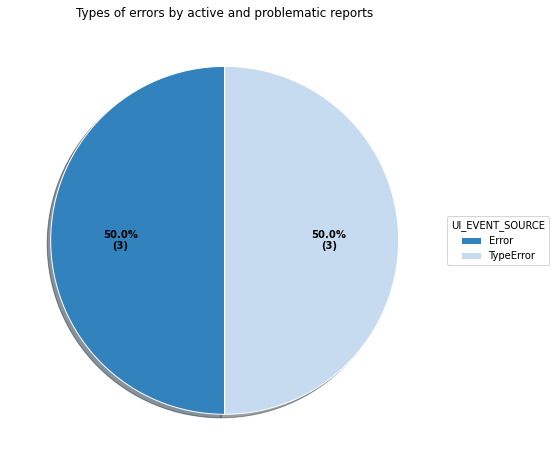

In [35]:
fig, ax = plt.subplots(figsize =(12, 8))

wedges, texts, autotexts = ax.pie(list_count,  
                                  autopct = lambda pct: func(pct, list_count), 
                                  shadow = True, 
                                  colors = outer_colors, 
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="black"))

ax.legend(wedges, list_ui_event_source, 
          title ="UI_EVENT_SOURCE", 
          loc ="center left", 
          bbox_to_anchor =(1, 0, 0.5, 1))

plt.setp(autotexts, size = 10, weight ="bold") 
ax.set_title("Types of errors by active and problematic reports") 
plt.show()